#Data loading and understanding

Import libraries

In [1]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df=pd.read_csv('/content/drive/My Drive/telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
df.info(verbose=all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [4]:
df.shape

(99999, 226)

In [5]:
# create backup of data
df_bk = df.copy()

In [6]:
# Utility Functions

def getNullCols(df,percent):
    # Function to retun the columns with more than percent% missing values.
    # argument: percent, % values threshold for missing values
    missing = round(100*(df.isnull().sum()/df.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > percent]),percent))
    return missing.loc[missing > percent]


def imputeNan(data,imputeColList=False,missingColList=False):
    # Function impute the nan with 0
    # argument: colList, list of columns for which nan is to be replaced with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [7]:
# checking the columns which has more than 70% of missing values
z=getNullCols(df,70)
print(z)

There are 40 features having more than 70% missing values/entries
date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6 

In [8]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

Out the these 40 features, many are required and are essential for analysis. The missing values for these features seems to suggest that these customers KPI's did not have any value at that month. We can choose to impute these values with 0 to make enable these features to give value to analysis.

In [9]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']

imputeNan(df,imputeCol)

z=getNullCols(df,50)
print(z)

There are 4 features having more than 50% missing values/entries
date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64


In [10]:
# fix date columns by deriving new variables
# Driver Variable

date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
for col in date_vars:
    df[col] = pd.to_datetime(df[col])


import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

df["rech_days_left_6"]      = (last_date_of_month_6 - df['date_of_last_rech_6']).astype('timedelta64[D]')
df["rech_days_left_7"]      = (last_date_of_month_7 - df['date_of_last_rech_7']).astype('timedelta64[D]')
df["rech_days_left_8"]      = (last_date_of_month_8 - df['date_of_last_rech_8']).astype('timedelta64[D]')

df.drop(date_vars, axis=1, inplace=True)



df.loc[np.isnan(df['rech_days_left_6']), ['rech_days_left_6']] = df['rech_days_left_6'].median()
df.loc[np.isnan(df['rech_days_left_7']), ['rech_days_left_7']] = df['rech_days_left_7'].median()
df.loc[np.isnan(df['rech_days_left_8']), ['rech_days_left_8']] = df['rech_days_left_8'].median()

In [11]:
# dropping the columns having more than 50% missing values
missingcol = list(getNullCols(df,50).index)
df.drop(missingcol,axis=1,inplace=True)
df.shape

There are 4 features having more than 50% missing values/entries


(99999, 222)

Filter High-Value Customers

In [12]:

# New DERIVED Columns for Total Data Recharge Amount

df["total_rech_data_amt_6"] = df["total_rech_data_6"]*df['av_rech_amt_data_6']
df["total_rech_data_amt_7"] = df["total_rech_data_7"]*df['av_rech_amt_data_7']
df["total_rech_data_amt_8"] = df["total_rech_data_8"]*df['av_rech_amt_data_8']
df["total_rech_data_amt_9"] = df["total_rech_data_9"]*df['av_rech_amt_data_9']

# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df.drop(drop_data_columns, axis=1, inplace=True)

In [13]:
# Filter high-value customers
avg_rech_amt_6_7 = (df["total_rech_amt_6"] + df["total_rech_data_amt_6"] + 
                      df["total_rech_amt_7"] + df["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc)
#df['avg_rech_amt_6_7']=avg_rech_amt_6_7
df = df[avg_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', df.shape)

70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 218)


Label the Chrun customer as churned using the 9th month data

In [14]:

# Identify Churn
X = df["total_ic_mou_9"] + df["total_og_mou_9"] + df["vol_2g_mb_9"] + df["vol_3g_mb_9"]
df["churn"] = np.where(X, 0, 1)


# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [hdr for hdr in list(df) if hdr.endswith("_9")]
drop_fourth_month_columns += ["sep_vbc_3g"]
df.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', df.shape);
df.head()

Number of columns droped here  =  53
Dataframe Shape:  (30001, 166)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,...,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_days_left_6,rech_days_left_7,rech_days_left_8,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,...,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,9.0,15.0,23.0,252.0,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,3.0,6.0,5.0,0.0,0.0,0.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,...,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,5.0,0.0,1.0,0.0,354.0,207.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,...,0.48,0.01,0.00,599.09,1009.92,0.00,306.57,197.27,0.00,301.78,150.67,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,0.0,1.0,1.0,604,40.45,51.86,0.00,12.0,24.0,7.0,0.0,712.0,540.0,0


Identify columns that have no varience & Drop

In [15]:

# Identify columns that have no varience
telecom_unique_count = df.nunique().sort_values(ascending=False)
#print("Dataframe Unique Values: \n", telecom_unique_count); print_ln()

# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero); 
drop_no_varience_columns = list(telecom_unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one); 
drop_no_varience_columns += list(telecom_unique_count_is_one.index)

df.drop(drop_no_varience_columns, axis=1, inplace=True)

print('Dataframe Shape: ', df.shape)
print('Number of columns dropped here  = ', len(drop_no_varience_columns))
print('Dataframe Shape: ', df.shape) 

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
Dataframe Unique Value Count is ONE (all same values): 
 std_ic_t2o_mou_8        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
last_date_of_month_8    1
last_date_of_month_7    1
last_date_of_month_6    1
loc_ic_t2o_mou          1
std_og_t2o_mou          1
loc_og_t2o_mou          1
circle_id               1
std_og_t2c_mou_6        1
dtype: int64
Dataframe Shape:  (30001, 153)
Number of columns dropped here  =  13
Dataframe Shape:  (30001, 153)


Identify and removing the row which has maximum null values

In [16]:

# small percentage of rows has more than or equal to 27 missing values
drop_rows = df.isnull().sum(axis=1) >= 27
print("Number of rows with >= 27 missing values = {}".format(drop_rows.sum()))
print("     % of rows with >= 27 missing values = {} %".format(drop_rows.sum()/df.shape[0]*100))

# drop rows with missing values greater >= 27
df = df[df.isnull().sum(axis=1) < 27]
print('Dataframe Shape after dropping rows: ', df.shape)

Number of rows with >= 27 missing values = 1497
     % of rows with >= 27 missing values = 4.989833672210926 %
Dataframe Shape after dropping rows:  (28504, 153)


Verifying how much imbalenced the dataset is

In [17]:

churn  = df["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))

Total Churn Count     = 1596
Total Not-Churn Count = 26908
Churn Rate            = 5.60%


In [18]:
df.shape

(28504, 153)

In [19]:
df.info(verbose=all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 153 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   mobile_number          int64  
 1   arpu_6                 float64
 2   arpu_7                 float64
 3   arpu_8                 float64
 4   onnet_mou_6            float64
 5   onnet_mou_7            float64
 6   onnet_mou_8            float64
 7   offnet_mou_6           float64
 8   offnet_mou_7           float64
 9   offnet_mou_8           float64
 10  roam_ic_mou_6          float64
 11  roam_ic_mou_7          float64
 12  roam_ic_mou_8          float64
 13  roam_og_mou_6          float64
 14  roam_og_mou_7          float64
 15  roam_og_mou_8          float64
 16  loc_og_t2t_mou_6       float64
 17  loc_og_t2t_mou_7       float64
 18  loc_og_t2t_mou_8       float64
 19  loc_og_t2m_mou_6       float64
 20  loc_og_t2m_mou_7       float64
 21  loc_og_t2m_mou_8       float64
 22  loc_og_t2f_mou_6     

In [20]:
# there are no date columns left to fix them
# df.reset_index(inplace=True,drop=True)
# # list of all columns which store date
# date_columns = list(df.filter(regex='date').columns)
# date_columns

# # Converting dtype of date columns to datetime
# for col in date_columns:
#     df[col] = pd.to_datetime(df[col], format='%m/%d/%Y')

#EDA

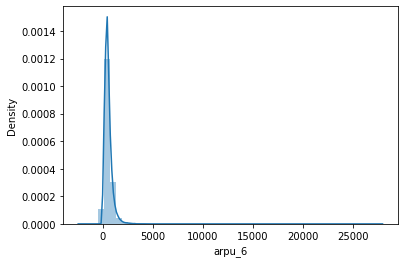

In [21]:
sns.distplot(df.arpu_6)

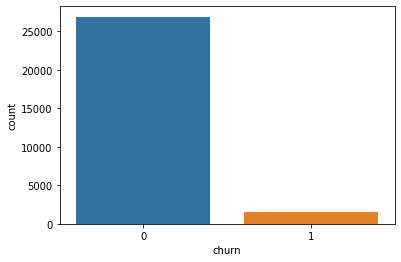

In [22]:
sns.countplot(x='churn', data=df)

As we observed earlier, churn rate is low in the overall dataset. So we would need to handle the class imbalance.

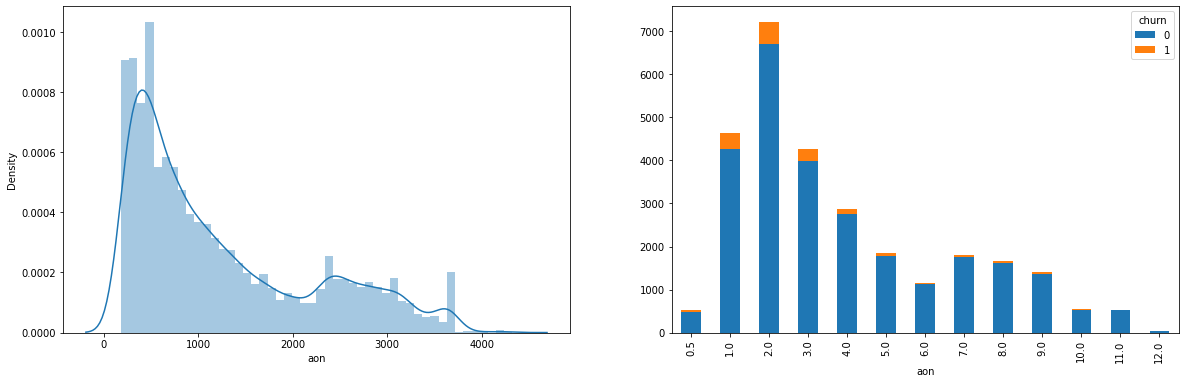

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(df['aon'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#sns.countplot(pd.cut(round(((data['aon']/30)/12),1), bins = bins, labels = labels ), ax =ax1)
pd.crosstab(pd.cut(round(((df['aon']/30)/12),1), bins = bins, labels = labels ), df['churn']).plot(kind='bar', stacked=True, ax = ax2)

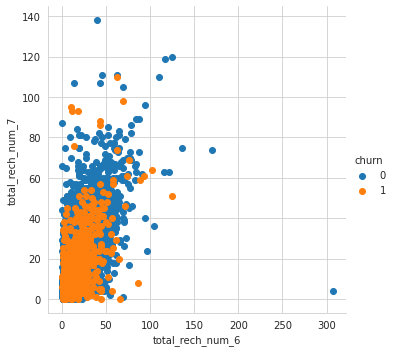

In [24]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

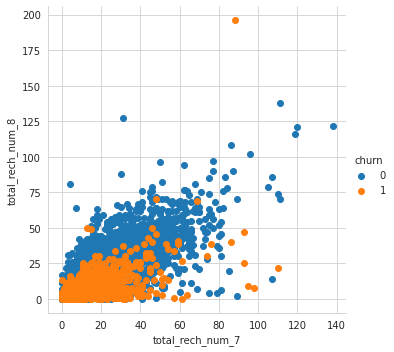

In [25]:
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

Text(0, 0.5, 'Avg. Incoming MOU')

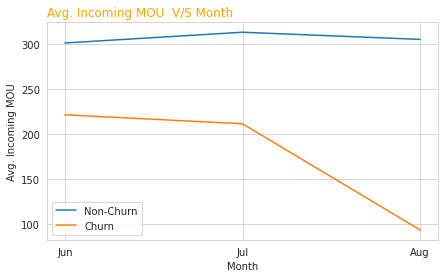

In [26]:
#incomming Call
colList = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
calltype='Incoming'
fig, ax = plt.subplots(figsize=(7,4))
z=df.groupby(['churn'])[colList].mean().T
plt.plot(z)
ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Month")
plt.ylabel("Avg. "+calltype+" MOU")

Text(0, 0.5, 'Avg. Incoming MOU')

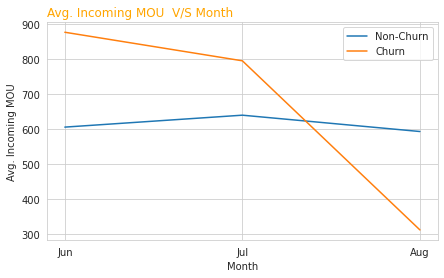

In [27]:
#Outgoing  Call
colList =  ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
calltype='Incoming'
fig, ax = plt.subplots(figsize=(7,4))
z=df.groupby(['churn'])[colList].mean().T
plt.plot(z)
ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Month")
plt.ylabel("Avg. "+calltype+" MOU")

It is expected that the customers who are going to be churn are reducing their call usage as the time passes 

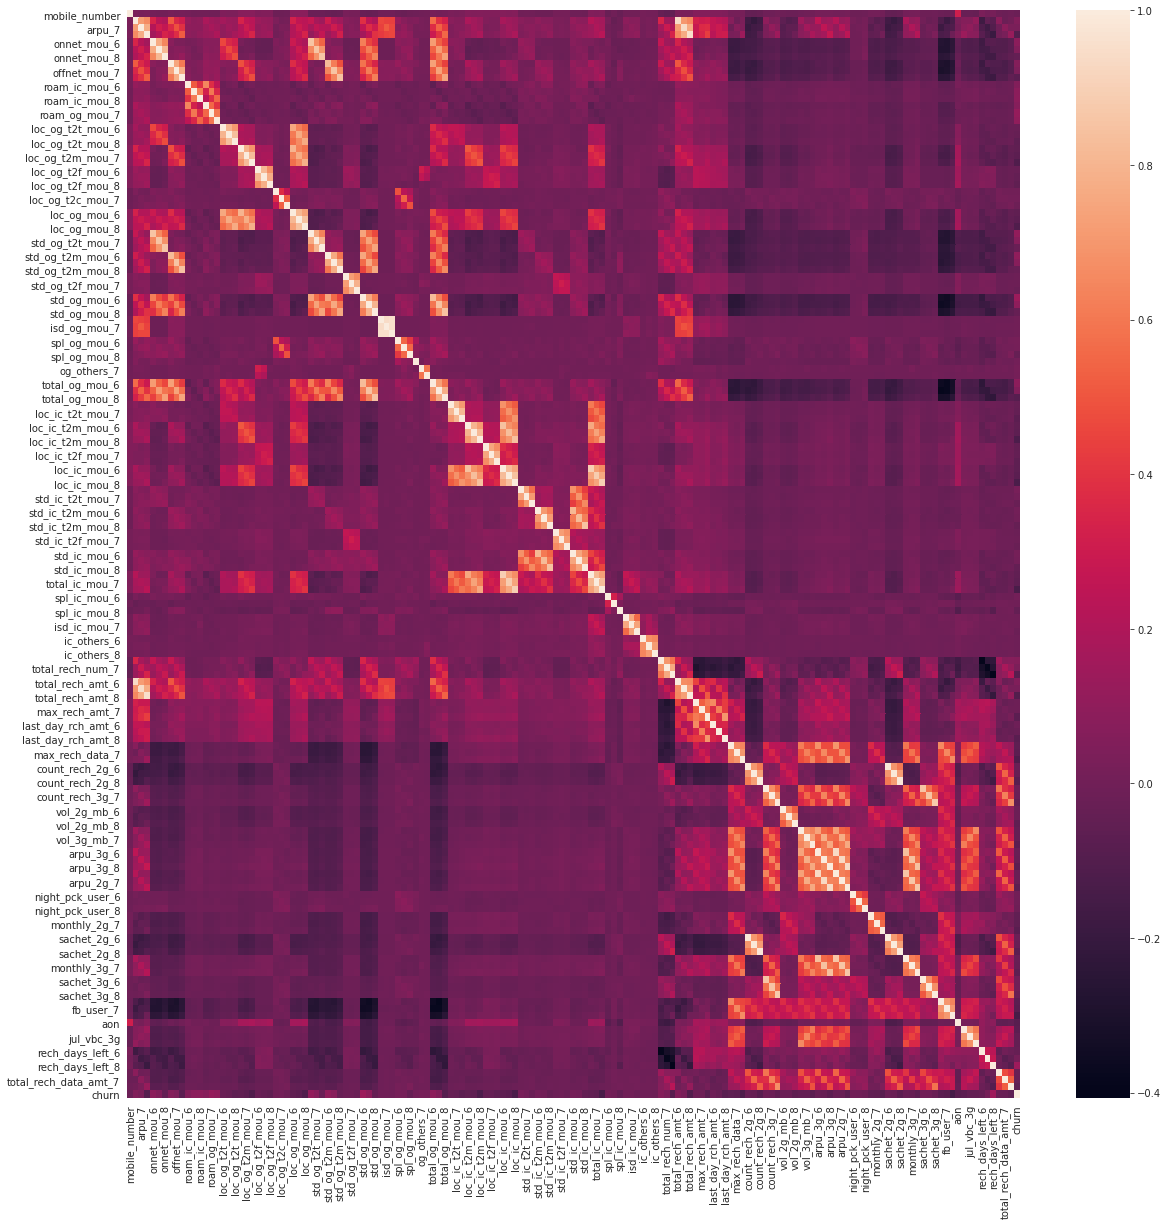

In [28]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df.corr())

In [29]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:45

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


# Data modeling 

In [30]:
df.shape

(28504, 153)

In [31]:
# Drop MemberID/Phone-number as it wont have any influence on weather a customer would churn or not
df = df.drop(['mobile_number'], axis=1)

# Creating dependent and indepedent variable set
X = df.drop(['churn'], axis=1)
y = df['churn']



# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

In [32]:
# lets scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:

churns=(y_train != 0).sum()
notchurns=(y_train != 1).sum()
print("Imbalance in Train Data: {0} churns and {1} not churns. Churn ratio is {2}".format(churns,notchurns,(churns/(churns+notchurns))))


Imbalance in Train Data: 1154 churns and 18798 not churns. Churn ratio is 0.05783881315156375


Balance data set by oversampling

In [34]:

# (Training) Balance Data-Set --- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular",random_state=42,ratio=1.0)
X_tr,y_tr = sm.fit_sample(X_train,y_train)



churns=(y_tr != 0).sum()
notchurns=(y_tr != 1).sum()
print("Imbalance in Train Data: {0} churns and {1} not churns. Churn ratio is {2}".format(churns,notchurns,(churns/(churns+notchurns))))

Imbalance in Train Data: 18798 churns and 18798 not churns. Churn ratio is 0.5


As you can see now both classes has a ration of 50-50 so now the data is balanced.

Feature reduction using RFE

In [35]:

# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_tr, y_tr)

In [36]:
rfe_features = list(X.columns[rfe.support_])
print("Features identified by RFE for model buidling: ", rfe_features)

Features identified by RFE for model buidling:  ['arpu_8', 'onnet_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon', 'rech_days_left_8']


#Creating predictive models

Logistic Regression Model

In [37]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(X_rfe, y_rfe)

X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = classifier.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6490 1620]
 [  73  369]]


In [39]:

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [40]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      8110
           1       0.19      0.83      0.30       442

    accuracy                           0.80      8552
   macro avg       0.59      0.82      0.59      8552
weighted avg       0.95      0.80      0.85      8552



Few of the observation that we can make here is


1.   Model gets a accuracy of 80%
2.   Model has a high false positive which is a drawback
3.   Model has key features which are as folllows <br/>
**['arpu_8', 'onnet_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8', 'vol_3g_mb_8', 'arpu_3g_8', 'aon', 'rech_days_left_8']**


#Improving the existing model

Applying PCA

In [41]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)


df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(37596, 151)
(8552, 151)


In [42]:
# Apply Logistic regression
# Let's run the model using the selected variables
logsk = LogisticRegression(random_state=42)
logsk.fit(df_train_pca, y_tr)

# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [43]:

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import  confusion_matrix, accuracy_score


# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6671 1439]
 [  85  357]]


In [44]:
print("LogisticRegression accuracy with {0} PCA: {1} %".format(len(pca.components_),round(accuracy_score(y_test,y_pred)*100,2)))

LogisticRegression accuracy with 151 PCA: 82.18 %


In [45]:
pca.components_

array([[ 9.83145222e-02,  9.23199582e-02,  4.25633861e-02, ...,
        -9.74425287e-02, -9.57537500e-02, -7.22643210e-02],
       [ 1.39781170e-01,  1.59887097e-01,  1.73169637e-01, ...,
         1.71020699e-02,  2.32172057e-02,  2.99928806e-02],
       [ 1.63860834e-03, -1.23076313e-02, -1.03840726e-02, ...,
        -4.76155412e-02, -5.41064430e-02, -4.63811819e-02],
       ...,
       [ 0.00000000e+00,  2.18069386e-17, -2.11247716e-17, ...,
        -5.47989676e-17,  3.38192185e-17, -1.41783356e-17],
       [ 0.00000000e+00,  3.69661376e-16, -1.29998890e-16, ...,
        -5.04521879e-17, -8.02210049e-17, -2.10285595e-17],
       [ 0.00000000e+00,  1.39386822e-16,  8.30099016e-17, ...,
         8.23808845e-17, -3.32594940e-17, -1.21231114e-17]])

In [46]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.098315,0.139781,0.001639,arpu_6
1,0.092320,0.159887,-0.012308,arpu_7
2,0.042563,0.173170,-0.010384,arpu_8
3,0.166135,0.013820,-0.057418,onnet_mou_6
4,0.161848,0.031750,-0.067457,onnet_mou_7
5,0.100760,0.058857,-0.052746,onnet_mou_8
6,0.165608,0.090183,-0.017262,offnet_mou_6
7,0.162639,0.107421,-0.029382,offnet_mou_7
8,0.088287,0.114721,-0.029871,offnet_mou_8
9,0.012658,0.024919,0.205765,roam_ic_mou_6


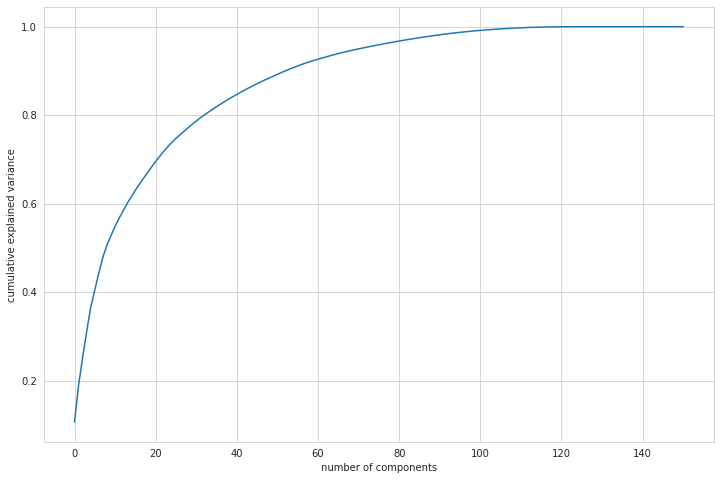

In [47]:

#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [48]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([10.63, 18.93, 25.24, 31.11, 36.57, 40.52, 44.31, 47.93, 50.63,
       52.81, 54.9 , 56.74, 58.44, 60.09, 61.59, 63.05, 64.45, 65.76,
       67.05, 68.31, 69.56, 70.73, 71.84, 72.9 , 73.87, 74.79, 75.59,
       76.39, 77.18, 77.96, 78.69, 79.4 , 80.05, 80.69, 81.32, 81.93,
       82.52, 83.1 , 83.66, 84.2 , 84.72, 85.24, 85.73, 86.21, 86.69,
       87.14, 87.58, 88.02, 88.44, 88.85, 89.26, 89.65, 90.04, 90.42,
       90.78, 91.14, 91.48, 91.8 , 92.1 , 92.38, 92.66, 92.92, 93.18,
       93.43, 93.68, 93.92, 94.15, 94.38, 94.59, 94.79, 94.98, 95.17,
       95.36, 95.54, 95.72, 95.9 , 96.07, 96.24, 96.41, 96.57, 96.73,
       96.89, 97.05, 97.2 , 97.35, 97.5 , 97.64, 97.77, 97.9 , 98.03,
       98.16, 98.28, 98.39, 98.5 , 98.6 , 98.7 , 98.8 , 98.89, 98.98,
       99.07, 99.15, 99.23, 99.3 , 99.36, 99.42, 99.48, 99.54, 99.59,
       99.64, 99.69, 99.73, 99.77, 99.81, 99.84, 99.86, 99.88, 99.9 ,
       99.92, 99.94, 99.95, 99.96, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97,

In [49]:
#Apply logistic regression with 48 columns (90% explained variance)


pca48 = PCA(n_components=48)

df_train_pca48 = pca48.fit_transform(X_tr)
print(df_train_pca48.shape)
df_test_pca48 = pca48.transform(X_test)
print(df_test_pca48.shape)


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(random_state=42)
logsk1.fit(df_train_pca48, y_tr)

# Predicted probabilities
y_pred48 = logsk1.predict(df_test_pca48)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred48)

(37596, 48)
(8552, 48)


In [50]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred48))

[[6634 1476]
 [  82  360]]


In [51]:
print(classification_report(y_test, y_pred48))

              precision    recall  f1-score   support

           0       0.99      0.82      0.89      8110
           1       0.20      0.81      0.32       442

    accuracy                           0.82      8552
   macro avg       0.59      0.82      0.61      8552
weighted avg       0.95      0.82      0.86      8552



In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
# check area under curve
print("AUC:    \t", round(roc_auc_score(y_test, y_pred48),2))

AUC:    	 0.82


In [54]:
print("LogisticRegression accuracy with {0} PCA: {1} %".format(len(pca48.components_),round(accuracy_score(y_test,y_pred48)*100,2)))

LogisticRegression accuracy with 48 PCA: 81.78 %


Using Advance Machine learning

In [55]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(37596, 45)
[  1  10  11  13  14  20  23  29  30  38  39  40  47  49  52  53  57  59
  65  68  78  79  80  83  84  91  92  93  98 101 104 107 108 109 113 116
 126 127 128 129 140 141 145 146 147]


In [56]:
lasso_features = list(X.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_7', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'max_rech_amt_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'fb_user_8', 'aon', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']


In [57]:
X_train_l = X_lasso
y_train_l = y_tr

print ("Feature space holds %d observations and %d features" % X_train_l.shape)
print ("Unique target labels:", np.unique(y_train_l))

Feature space holds 37596 observations and 45 features
Unique target labels: [0 1]


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_l, y_train_l)


# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8110
           1       0.23      0.78      0.35       442

    accuracy                           0.85      8552
   macro avg       0.61      0.82      0.64      8552
weighted avg       0.95      0.85      0.89      8552



In [59]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(round(accuracy_score(y_test,y_pred_default)*100,2))

[[6957 1153]
 [  99  343]]
85.36


In [60]:
# Hyperparameter Tuning

#tuning max depth

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_l, y_train_l)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [61]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.133021,0.003567,0.002349,0.000028,1,{'max_depth': 1},0.780851,0.799441,0.802500,0.804495,0.805825,0.798623,0.009142,39,0.803066,0.798417,0.797653,0.797154,0.796821,0.798622,0.002286
1,0.241578,0.004691,0.002505,0.000133,2,{'max_depth': 2},0.786436,0.812741,0.819790,0.818061,0.819657,0.811337,0.012711,38,0.817595,0.811018,0.809223,0.809688,0.809289,0.811363,0.003183
2,0.345468,0.004497,0.002424,0.000049,3,{'max_depth': 3},0.831782,0.855433,0.854901,0.855832,0.859689,0.851527,0.010017,37,0.856663,0.849653,0.850883,0.857898,0.851681,0.853355,0.003293
3,0.443081,0.003108,0.002456,0.000028,4,{'max_depth': 4},0.844814,0.872456,0.877111,0.870860,0.877377,0.868524,0.012126,36,0.879971,0.869302,0.871397,0.869169,0.868903,0.871748,0.004206
4,0.541200,0.006985,0.002494,0.000033,5,{'max_depth': 5},0.856383,0.882032,0.888682,0.881101,0.887618,0.879163,0.011773,35,0.891874,0.881039,0.880573,0.879044,0.881903,0.882887,0.004589


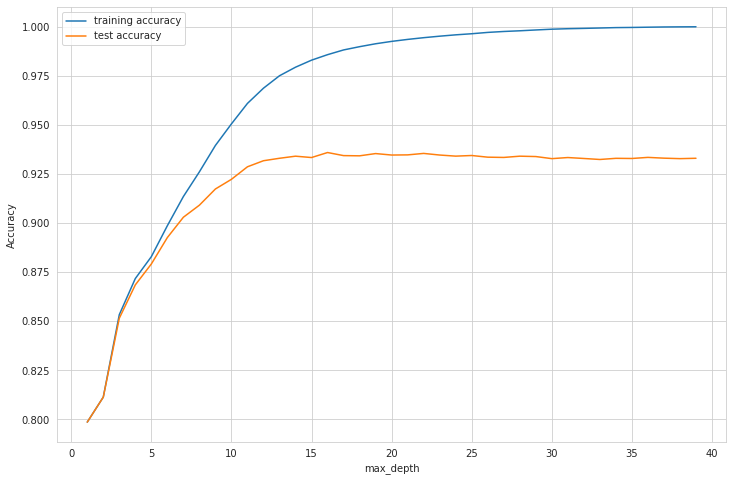

In [62]:
# plotting accuracies with max_depth
plt.figure(figsize = (12,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

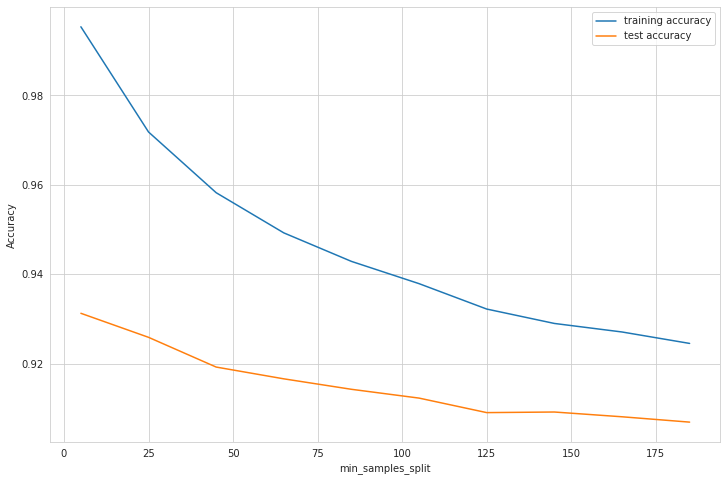

In [63]:


# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_l, y_train_l)

scores = tree.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure(figsize = (12,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [64]:
# model with optimal hyperparameters
finaltree = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
finaltree.fit(X_train_l, y_train_l)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [65]:
y_preds=finaltree.predict(X_test)

print("Decision Tree accuracy with with optimal hyperparameter: {0} %".format(round(finaltree.score(X_test,y_test)*100,2)))

Decision Tree accuracy with with optimal hyperparameter: 89.29 %


In [66]:
print(confusion_matrix(y_test,y_preds))

[[7319  791]
 [ 125  317]]


1. As you can see after using optimal hyperparameter and lasso norm on Decision tree we have increased the accuracy to 89  % <br/>
2. Only 45 features is used in this model.
3. Still there is scope for optimization looking at the confusion matrix

In [67]:
# Using random Forest

from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

rfc.fit(X_train_l, y_train_l)

predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8110
           1       0.46      0.58      0.51       442

    accuracy                           0.94      8552
   macro avg       0.72      0.77      0.74      8552
weighted avg       0.95      0.94      0.95      8552



In [68]:
# Printing confusion matrix
print(confusion_matrix(y_test, predictions))

print(round(accuracy_score(y_test, predictions)*100,2))

[[7808  302]
 [ 185  257]]
94.31


The accuracy of 94.31 % is decent which why we can stop at this stage but if more fine tuning is needed the following steps can be used.

The accuracy has increased now from 80% to 94% and the confusion matrix is compatively more stable

In [69]:
# this part is commented becuase it takes lot of time to commute the optimal values.
# # specify number of folds for k-fold CV
# n_folds = 5

# # parameters to build the model on
# param_grid = {
#     'max_depth': [4,8,10],
#     'min_samples_leaf': range(100, 400, 200),
#     'min_samples_split': range(200, 500, 200),
#     'n_estimators': [100,200, 300], 
#     'max_features': [5, 10,20,30,40,50]
# }

# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1,verbose = 1)

# # fit tree on training data
# grid_search.fit(X_train_l, y_train_l)

# # scores of GridSearch CV
# scores = grid_search.cv_results_
# pd.DataFrame(scores).head()

# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

# model with the best hyperparameters
# from sklearn.ensemble import RandomForestClassifier
# here the values need to be changed to what is obtained to be optimal from the previous step
# rfc = RandomForestClassifier(bootstrap=True,
#                              max_depth=10,
#                              min_samples_leaf=100, 
#                              min_samples_split=200,
#                              max_features=10,
#                              n_estimators=100)

# # fit tree on training data
# rfc.fit(X_train_l, y_train_l)

# predictions = rfc.predict(X_test)

# print(classification_report(y_test,predictions))
# print(confusion_matrix(y_test,predictions))
# print(round(accuracy_score(y_test, predictions)*100,2))

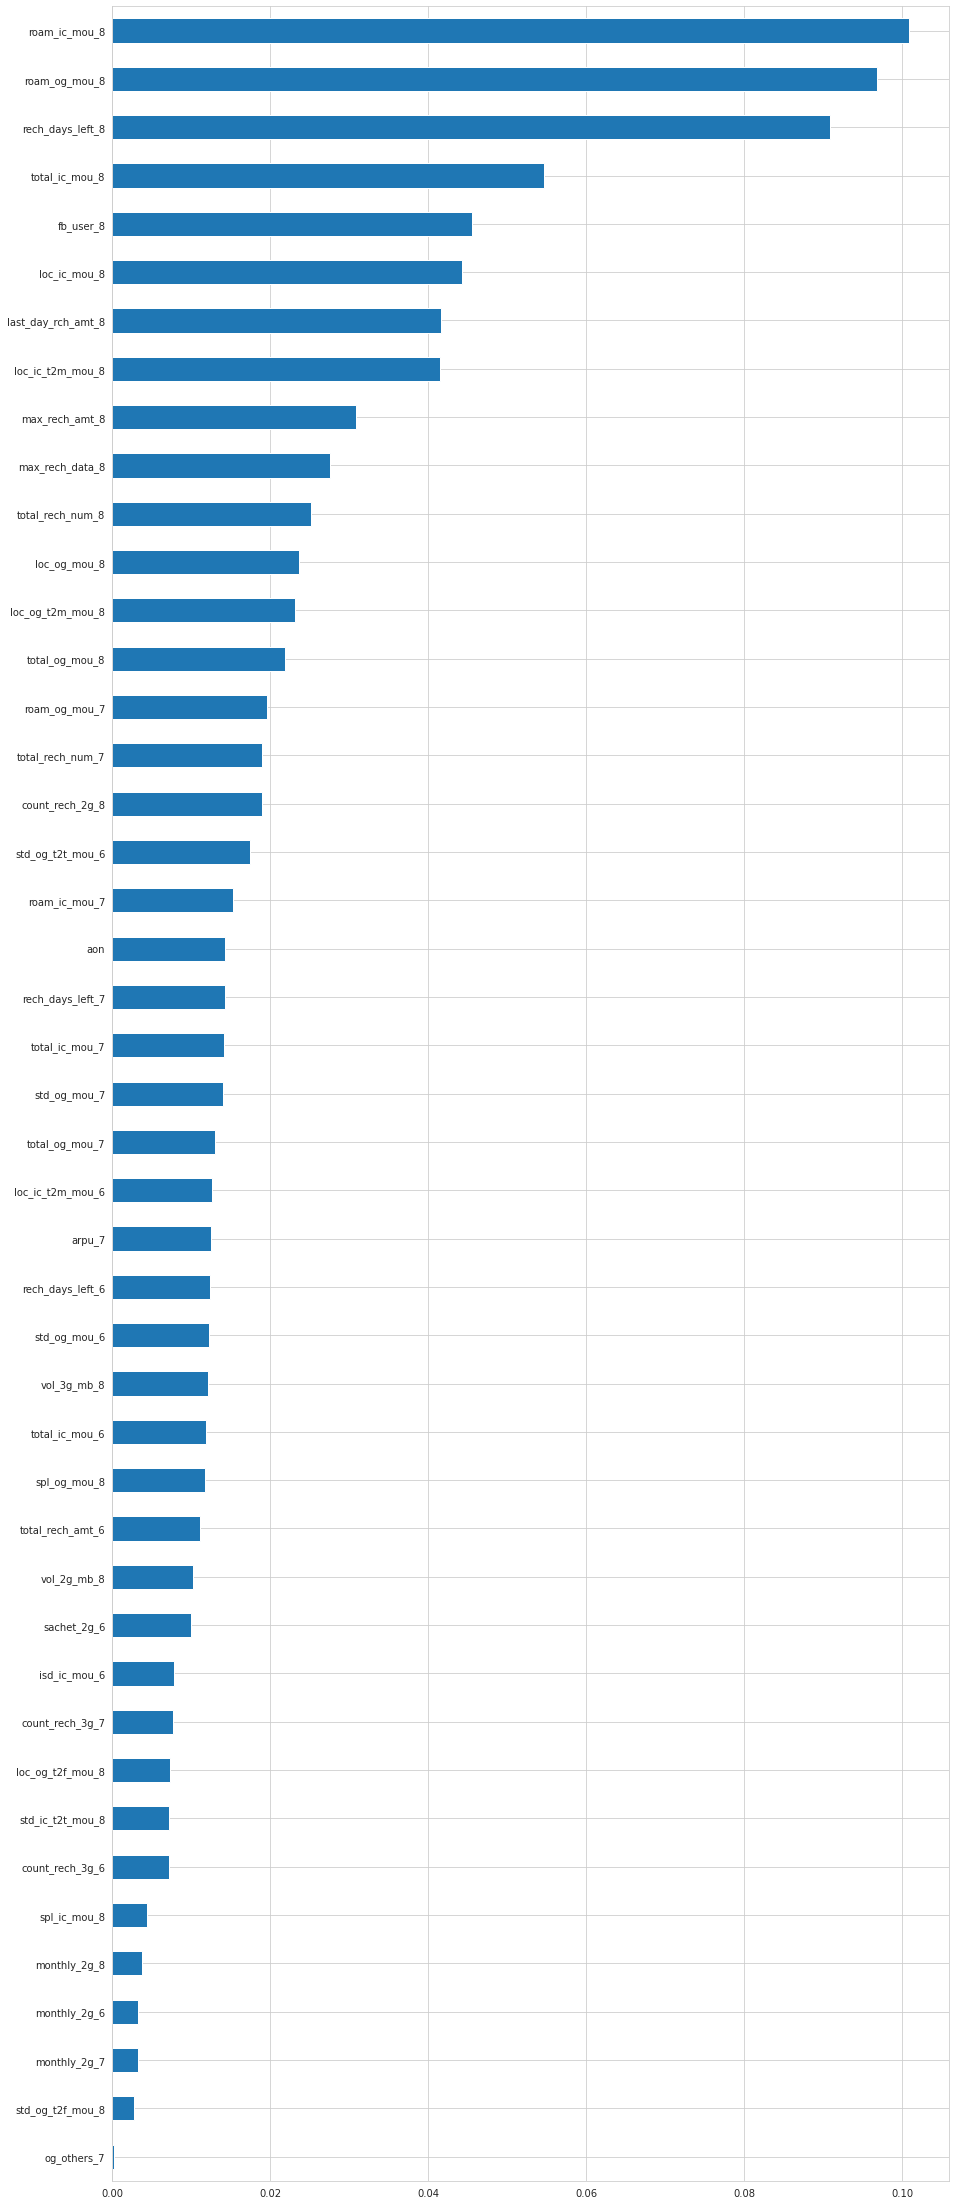

In [70]:
# Listing of most important variables

plt.figure(figsize=(15,40))
feat_importances = pd.Series(rfc.feature_importances_, index=lasso_features)
feat_importances.nlargest(len(lasso_features)).sort_values().plot(kind='barh', align='center')
plt.show()

#Conclusion

## **Suggestions based on the data analysis**


*   Monitor Customer usage ( both calls and data)
*   For customer who shows usage drop in last 3 months offer them good service deals which is hard to decline
*   The company needs to pay more attention to the roaming rates.they should provide the good offers to the customer and also improve the roming services for the potential churn customers
*   last_day_rch_amt_8 - Lower the last day recharge amount then churn rate will be higher.
* max_rech_amt_8 - Need to give attention to the customer whoes Avg max recharge amount has been decreased
*   Do consider the imporant variable to make further predictive analysys by making informative reports

